# Exploring and Cleaning a Data Set


 By: Dr. Eric Godat and Dr. Rob Kalescky
 
 Natural Language Toolkit: [Documentation](http://www.nltk.org/)
 
 Reference Text: [Natural Language Processing with Python](http://www.nltk.org/book/)
 

## Setup

These are the basic libraries we will use in for data manipulation (pandas) and math functions (numpy). We will add more libraries as we need them.

As a best practice, it is a good idea to load all your libraries in a single cell at the top of a notebook, however for the purposes of this tutorial we will load them as we go.

In [1]:
import pandas as pd
import numpy as np

Load a data file into a pandas DataFrame.

This tutorial was designed around using sets of data you have yourselves in a form like a CSV, TSV, or TXT file.  Feel free to use any set of data, but for now we will use a dataset created from scraping this [Multilingual Folktale Database](http://www.mftd.org/).

This file is a CSV filetype, common for text data, but your data may also be stored as TSV's, TXT's, or other file types.  This will slightly change how you read from Pandas, but the concept is largely the same for the different filetypes.  Just keep this in mind when you see references to CSV.

To proceed, you will need to have this file downloaded and in the same folder as this notebook. Alternatively you can put the full path to the file.  Typically, your program will look for the file with the name you specified in the folder that contains your program unless you give the program a path to follow.

In [2]:
data = pd.read_csv('../data/folktales.csv')
data.head()

,Unnamed: 0,ATU Code,Author,Country of Origin,Original Title,Source,Story,Story Type,Title,Translated,Year Translated,Year Written
0,17,15.0,Jacob & Wilhelm Grimm,Germany,Katze und Maus in Gesellschaft,NaN,"A cat had made the acquaintance of a mouse, an...",Stealing the Partner's Butter (ATU 15)\n\t\t,Cat and mouse in partnership,Margaret Hunt,1884.0,1812
1,44,123.0,Jacob & Wilhelm Grimm,Germany,Der Wolf und die sieben jungen Geisslein,NaN,There was once an old goat who had seven littl...,The Wolf and the Seven Young Kids (ATU 123)\n...,The Wolf and the Seven Young Kids,Margaret Hunt,1884.0,1812
2,54,516.0,Jacob & Wilhelm Grimm,Germany,Der treue Johannes,The Blue Fairy Book (nr. 30),ONCE upon a time there was an old king who was...,The Petrified Friend (ATU 516)\n\t\t,Trusty John,Andrew Lang,1889.0,1812
3,64,NaN,Jacob & Wilhelm Grimm,Germany,Der gute Handel,NaN,There was once a peasant who had driven his co...,NaN,The good bargain,Margaret Hunt,1884.0,1812
4,74,151.0,Jacob & Wilhelm Grimm,Germany,Der wunderliche Spielmann,NaN,"There was once a wonderful musician, who went ...",Music lessons for wild animals (ATU 151)\n\t\t,The Wonderful Musician,Translated into English,NaN,1812


Here we can see all the information available to us from the file in the form of a Pandas DataFrame. For the remainder of this tutorial, we will focus primarily on the full text of each data chunk, which we will name the *Story* column.  With your data set this is likely to be something very different, so feel free to call is something else.

## Counting Words and Characters

The first bit of analysis we might want to do is to count the number of words in one piece of data. To do this we will add a column called *wordcount* and write an operation that applies a function to every row of the column.

Unpacking this piece of code, *len(str(x).split(" ")*, tells us what is happening.

For the content of cell *x*, convert it to a string, *str()*, then split that string into pieces at each space, *split()*.

The result of that is a list of all the words in the text and then we can count the length of that list, *len()*.

In [3]:
data['wordcount'] = data['Story'].apply(lambda x: len(str(x).split(" ")))
data[['Story','wordcount']].head()

,Story,wordcount
0,"A cat had made the acquaintance of a mouse, an...",987
1,There was once an old goat who had seven littl...,1037
2,ONCE upon a time there was an old king who was...,3068
3,There was once a peasant who had driven his co...,1723
4,"There was once a wonderful musician, who went ...",1066


We can do something similar to count the number of characters in the data chunk, including spaces. If you wanted to exclude whitespaces, you could take the list we made above, join it together and count the length of the resulting string.

In [4]:
data = data.fillna("No Information Provided") #If some of our data is missing, this will replace the blank entries. This is only necessary in some cases


In [5]:
data['char_count'] = data['Story'].str.len() ## this also includes spaces, to do it without spaces, you could use something like this: "".join()
data[['Story','char_count']].head()

,Story,char_count
0,"A cat had made the acquaintance of a mouse, an...",5108
1,There was once an old goat who had seven littl...,5343
2,ONCE upon a time there was an old king who was...,15999
3,There was once a peasant who had driven his co...,8907
4,"There was once a wonderful musician, who went ...",5592


Now we want to calculate the average word length in the data.

Let's define a function that will do that for us:

In [6]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

We can now apply that function to all the data chunks and save that in a new column.

In [7]:
data['avg_word'] = data['Story'].apply(lambda x: avg_word(x))
data[['Story','avg_word']].head()

,Story,avg_word
0,"A cat had made the acquaintance of a mouse, an...",4.176292
1,There was once an old goat who had seven littl...,4.153327
2,ONCE upon a time there was an old king who was...,4.215124
3,There was once a peasant who had driven his co...,4.170052
4,"There was once a wonderful musician, who went ...",4.246717


We can then sort by the average word length.

In [8]:
data[['Story','avg_word']].sort_values(by='avg_word', ascending=True).head()

,Story,avg_word
659,"A GNAT settled on the horn of a Bull, and sa...",3.623377
656,"A MAN wished to purchase an Ass, and agreed ...",3.709924
620,A HOUND having started a Hare on the hillsid...,3.737374
391,Once on a time there was a little boy who was ...,3.771277
895,"Hare once said to Elephant : "" Let us play hid...",3.795652


In [12]:
data[['Story','avg_word']].sort_values(by='avg_word', ascending=False).head()

,Story,avg_word
760,"Great Jove, in his paternal care,Has giv'n a m...",5.833333
763,"When the She-Goats from Jove obtain'dA beard, ...",5.809524
718,FULL often what you now despiseProves better t...,5.659574
479,With his suite the Tsar departed.The Tsaritsa ...,5.524215
780,"Bald, naked, of a human shape,With fleet wings...",5.457143


### Count Stopwords

Stopwords are words that are commonly used and do little to aid in the understanding of the content of a text. There is no universal list of stopwords and they vary on the style, time period and media from which your text came from.  Typically, people choose to remove stopwords from their data, as it adds extra clutter while the words themselves provide little to no insight as to the nature of the data.  For now, we are simply going to count them to get an idea of how many there are.

For this tutorial, we will use the standard list of stopwords provided by the Natural Language Toolkit python library.

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/bgioino/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

To count the number of stopwords in a chunk of data, we make a list of all the words in our data that are also in the stopword list. We can then just take the length of that list and store it in a new column

In [15]:
data['stopwords'] = data['Story'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Story','stopwords','wordcount']].head()

,Story,stopwords,wordcount
0,"A cat had made the acquaintance of a mouse, an...",446,987
1,There was once an old goat who had seven littl...,505,1037
2,ONCE upon a time there was an old king who was...,1471,3068
3,There was once a peasant who had driven his co...,745,1723
4,"There was once a wonderful musician, who went ...",470,1066


### Other Ways to Count

There are other types of counting we might want to do. These might be more or less relevant depending on the test you are working with.

For completeness, we have put them here but we will skip over them in this tutorial

#### Counting Special Characters

This is really only useful for Twitter or other Internet texts but you could imagine wanting to count quotations or exclamations with something similar.

In [16]:
data['special_char'] = data['Story'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Story','special_char']].head()

,Story,special_char
0,"A cat had made the acquaintance of a mouse, an...",0
1,There was once an old goat who had seven littl...,0
2,ONCE upon a time there was an old king who was...,0
3,There was once a peasant who had driven his co...,0
4,"There was once a wonderful musician, who went ...",0


#### Counting Numbers

This counts the number of numerical digits in a text, which for strict text may not be helpful, but mostly numerical data will make more use of this.

In [17]:
data['numerics'] = data['Story'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Story','numerics']].sort_values(by='numerics', ascending=False).head()

,Story,numerics
416,Osborn’s PipeONCE on a time there was a poor t...,9
414,ONCE FIVE women were reaping in a field. Each ...,4
696,There was once a husband and a wife who had tw...,2
311,There once lived an old man who had three daug...,2
727,"Whoever, to his honor's cost,His pristine dign...",1


#### Counting Uppercase

Counting uppercase words could give us an indication of how many sentences or proper nouns are in a text but this is likely too broad to be used to classify either on its own.

In [18]:
data['upper'] = data['Story'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Story','upper']].head()

,Story,upper
0,"A cat had made the acquaintance of a mouse, an...",12
1,There was once an old goat who had seven littl...,5
2,ONCE upon a time there was an old king who was...,39
3,There was once a peasant who had driven his co...,35
4,"There was once a wonderful musician, who went ...",19


# Processing Text

A major component of doing analysis on text is the cleaning of the text prior to the analysis.

Though this process destroys some elements of the text (sentence structure, for example), it is often necessary in order to describe a text analytically. Depending on your choice of cleaning techniques, some elements might be preserved better than others if that is of importance to your analysis.

## Cleaning Up Words

This series of steps aims to clean up and standardize the text itself. This generally consists of removing common elements such as stopwords and punctuation but can be expanded to more detailed removals.

### Lowercase

Here we enforce that all of the text is lowercase. This makes it easier to match cases and sort words.

Notice we are assigning our modified column back to itself. This will save our modifications to our DataFrame

In [19]:
data['Story'] = data['Story'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Story'].head()

0    a cat had made the acquaintance of a mouse, an...
1    there was once an old goat who had seven littl...
2    once upon a time there was an old king who was...
3    there was once a peasant who had driven his co...
4    there was once a wonderful musician, who went ...
Name: Story, dtype: object

### Remove Punctuation

Here we remove all punctuation from the data. This allows us to focus on the words only as well as assist in matching.

In [20]:
data['Story'] = data['Story'].str.replace('[^\w\s]','')
data['Story'].head()

/tmp/ipykernel_397560/3005510997.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Story'] = data['Story'].str.replace('[^\w\s]','')


0    a cat had made the acquaintance of a mouse and...
1    there was once an old goat who had seven littl...
2    once upon a time there was an old king who was...
3    there was once a peasant who had driven his co...
4    there was once a wonderful musician who went q...
Name: Story, dtype: object

### Remove Stopwords

Similar to what we did earlier when we counted stopwords, we now want to remove the stopwords. We will again use the NLTK list of stopwords but this time keep a list of words that do not appear in the list of stopwords.

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [22]:
data['Story'] = data['Story'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Story'].head()

0    cat made acquaintance mouse said much great lo...
1    old goat seven little ones fond ever mother ch...
2    upon time old king ill thought likely deathbed...
3    peasant driven cow fair sold seven thalers way...
4    wonderful musician went quite alone forest tho...
Name: Story, dtype: object

### Remove Frequent Words

If we want to catch common words that might have slipped through the stopword removal, we can build out a list of the most common words remaining in our text.

Here we have built a list of the 10 most common words. Some of these words might actually be relevant to our analysis so it is important to be careful with this method.

In [23]:
freq = pd.Series(' '.join(data['Story']).split()).value_counts()[:10]
freq

said      9644
one       4980
came      3502
little    3489
went      3317
could     3040
would     3023
king      2846
old       2764
man       2375
dtype: int64

We now follow the same procedure with which we removed stopwords to remove the most frequent words.

In [24]:
freq = list(freq.index)
data['Story'] = data['Story'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Story'].head()

0    cat made acquaintance mouse much great love fr...
1    goat seven ones fond ever mother children day ...
2    upon time ill thought likely deathbed send tru...
3    peasant driven cow fair sold seven thalers way...
4    wonderful musician quite alone forest thought ...
Name: Story, dtype: object

### Remove Rare Words

By analogy, we can remove the most rare words. Some of these are strange misspellings or [hapax legomenon](https://en.wikipedia.org/wiki/Hapax_legomenon) (one off words that don't appear anywhere else in the text).

In [25]:
freq = pd.Series(' '.join(data['Story']).split()).value_counts()[-10:]
freq

schoolmasterif    1
understoodand     1
kirstenbut        1
goodthat          1
readlater         1
bookbinder        1
themhans          1
cagei             1
hansthe           1
moonfrom          1
dtype: int64

Again, removing words following the same process as the stopword removal.

In [26]:
freq = list(freq.index)
data['Story'] = data['Story'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Story'].head()

0    cat made acquaintance mouse much great love fr...
1    goat seven ones fond ever mother children day ...
2    upon time ill thought likely deathbed send tru...
3    peasant driven cow fair sold seven thalers way...
4    wonderful musician quite alone forest thought ...
Name: Story, dtype: object

### Correct Spelling

Misspellings can cause inaccuracies in text analysis. For example, "the" and "teh" are likely intended to be the same word and a reader might gloss over that typo, but a computer would view them as distinct.

To help address this we will leverage the [TextBlob package](https://textblob.readthedocs.io/en/dev/) to check the spelling.

Since this can be slow and often of questionable usefulness, we have limited the check to the first 5 rows of our DataFrame.

It is also worth keeping in mind that, much like autocorrect on your phone, the spellchecking here is not going to be perfectly accurate and could result in just as many errors as it fixes (especially if you are working on text from edited or published sources).

In [27]:
from textblob import TextBlob
data['Story'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    cat made acquaintance mouse much great love fr...
1    goat seven ones fond ever mother children day ...
2    upon time ill thought likely deathbed send tru...
3    peasant driven cow fair sold seven thaler way ...
4    wonderful musician quite alone forest thought ...
Name: Story, dtype: object

### Tokenization

Tokenization is the process of splitting up a block of text into a sequence of words or sentences.

For those familiar with R and the Tidyverse, this would be referred to as unnesting tokens

Here we show all the tokenized words from the first data chunk in our Dataframe.

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /users/bgioino/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
from textblob import TextBlob

TextBlob(data['Story'][0]).words

WordList(['cat', 'made', 'acquaintance', 'mouse', 'much', 'great', 'love', 'friendship', 'felt', 'last', 'mouse', 'agreed', 'live', 'keep', 'house', 'together', 'must', 'make', 'preparations', 'winter', 'else', 'shall', 'suffer', 'hunger', 'cat', 'mouse', 'can', 'not', 'venture', 'everywhere', 'end', 'caught', 'trap', 'good', 'advice', 'followed', 'bought', 'pot', 'fat', 'know', 'store', 'finally', 'much', 'consideration', 'cat', 'know', 'place', 'better', 'stored', 'church', 'dares', 'take', 'anything', 'away', 'put', 'beneath', 'altar', 'touch', 'need', 'pot', 'stored', 'safely', 'away', 'long', 'cat', 'took', 'great', 'longing', 'mouse', 'wanted', 'tell', 'mouse', 'cousin', 'brought', 'son', 'world', 'asked', 'godfather', 'white', 'brown', 'spots', 'hold', 'baptismal', 'font', 'let', 'go', 'today', 'look', 'house', 'yes', 'yes', 'answered', 'mouse', 'means', 'go', 'get', 'anything', 'good', 'eat', 'think', 'like', 'drink', 'drop', 'sweet', 'red', 'christening', 'wine', 'however', 'u

## Stemming

Stemming is the process of removing suffices, like "ed" or "ing".

We will use another standard NLTK package, PorterStemmer, to do the stemming.

In [34]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Story'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    cat made acquaint mous much great love friends...
1    goat seven one fond ever mother children day g...
2    upon time ill thought like deathb send trusti ...
3    peasant driven cow fair sold seven thaler way ...
4    wonder musician quit alon forest thought manne...
Name: Story, dtype: object

As we can see "wonderful" became "wonder", which could help an analysis, but "deathbed" became "deathb" which is less helpful.

## Lemmatization

Lemmatization is often a more useful approach than stemming because it leverages an understanding of the word itself to convert the word back to its root word. However, this means lemmatization is less aggressive than stemming (probably a good thing).

In [43]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /users/bgioino/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /users/bgioino/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
from textblob import Word
data['Story'] = data['Story'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Story'].head()

0    cat made acquaintance mouse much great love fr...
1    goat seven one fond ever mother child day go w...
2    upon time ill thought likely deathbed send tru...
3    peasant driven cow fair sold seven thalers way...
4    wonderful musician quite alone forest thought ...
Name: Story, dtype: object

## Visualizing Text

Now, we are going to make a word cloud based on our data set. We're going to use the [wordcloud](https://amueller.github.io/word_cloud/) package to help us do that.

In [45]:
import wordcloud

In [49]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='retina'

stop_words = set(stop)
stop_words.update(["saw"])

If you want to update the stopwords after you see the wordcloud, type them into the empty list above and remove the # sign.

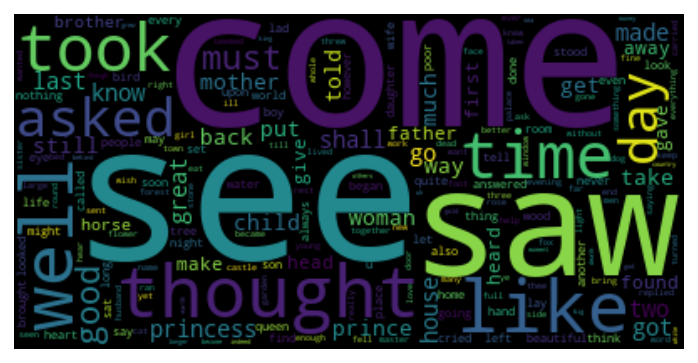

In [50]:
word = " ".join(data['Story'])
wordcloud = WordCloud(stopwords=stop, background_color="black").generate(word)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above code creates a wordcloud based off all the words (except for stop words) in all of the stories. While this can be fun, it may not be as interesting as a wordcloud for a single story. Let's compare:

Title: Cat and mouse in partnership


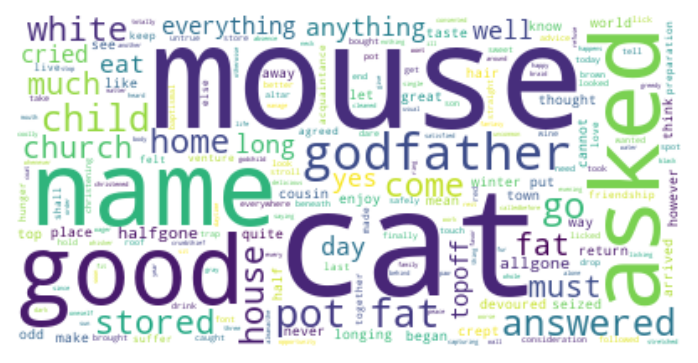

Title: The Wolf and the Seven Young Kids


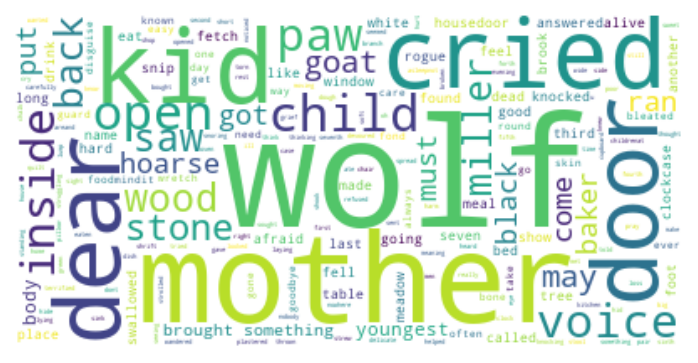

Title: Trusty John


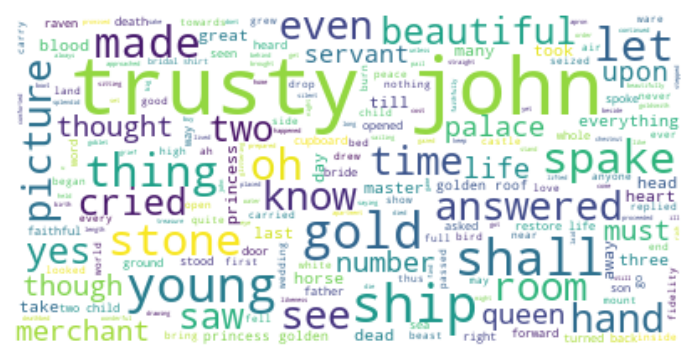

Title: The good bargain


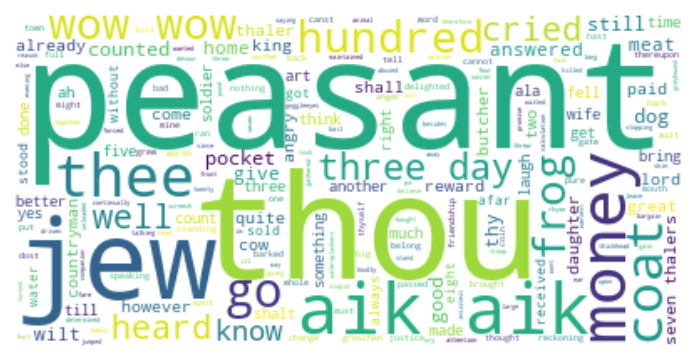

Title: The Wonderful Musician


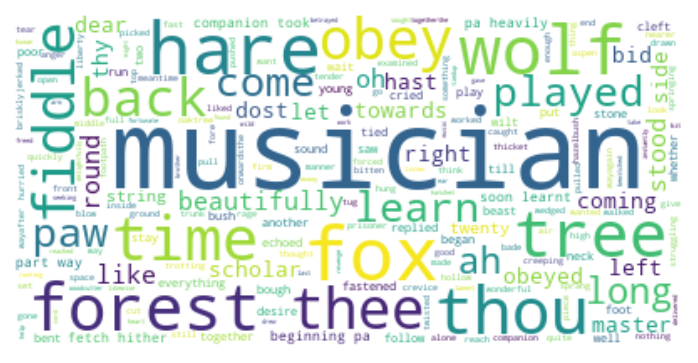

In [48]:
for i in range(0, 5):
    print('Title: {}'.format(data['Title'][i]))
    word = data['Story'][i]
    wordcloud = WordCloud(stopwords=stop, background_color="white").generate(word)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Wrapping Up

At this point we have a several options for cleaning and structuring our text data. We learned how to load data, do basic cleaning and start to analyze our data with some simple counting methods.